In [35]:
import nltk
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

In [36]:
keywords = ["machine tool",
"metal cutting",
"manufacturing",
"additive manufacturing",
"3d printing",
"metal forming",
"injection molding",
"robot",
"aluminium",
"aluminum",
"alloy"]
stopwords = nltk.corpus.stopwords.words('english')

In [37]:
def freq(word, tokens):
    return tokens.count(word)

def word_count(tokens):
    return len(tokens)

def tf(word, tokens):
    return (freq(word, tokens) / float(word_count(tokens)))

def getFreqByDoc(doc):
    #get tokens
    tokens = nltk.word_tokenize(str(doc[1]) + ' ' + str(doc[2]))
    
    #get bitokens
    bi_tokens =  nltk.bigrams(tokens)
    bi_tokens = [' '.join(token).lower() for token in bi_tokens]
    bi_tokens = [token for token in bi_tokens if token not in stopwords]

    tokens = [token.lower() for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in stopwords]

    #merge tokens and bi
    alltokens = []
    alltokens.extend(tokens)
    alltokens.extend(bi_tokens)

    olist = []
    for word in (keywords):
        f = freq(word, alltokens)
        ilist = [doc[0], word, f]
        olist.append(ilist)
    df = pd.DataFrame(olist, columns=['doc','word', 'frequency'])
    return df

def createFreqDf(sdf):
    #pass a sample df
    #make a list so that it can be iterated
    mfgDfSampleList = sdf.as_matrix().tolist()
    mfgFreqDfList = []
    for mfg in mfgDfSampleList:
        df = getFreqByDoc(mfg)
        mfgFreqDfList.append(df)

    mfgFreqDf = pd.concat(mfgFreqDfList)
    return mfgFreqDf

In [38]:
#reading the abstracts from known mfg data in to a DF
mfgDf = pd.DataFrame.from_csv('../../data/cirp_abstracts.csv', index_col=None)
nsfDf = pd.DataFrame.from_csv('../../data/nsf_abstracts_neg.csv', index_col=None)

In [39]:
#draw samples of 100
mfgDfSample = mfgDf.sample(1000)
nsfDfSample = nsfDf.sample(1000)

In [40]:
mfgf = createFreqDf(mfgDfSample)
#print(mfgf)
nsff = createFreqDf(nsfDfSample)
#print(nsfgf)    
mfgf.head()

,doc,word,frequency
0,CIRP_20110101_2011-60-1-0033-A,machine tool,0
1,CIRP_20110101_2011-60-1-0033-A,metal cutting,0
2,CIRP_20110101_2011-60-1-0033-A,manufacturing,0
3,CIRP_20110101_2011-60-1-0033-A,additive manufacturing,0
4,CIRP_20110101_2011-60-1-0033-A,3d printing,0


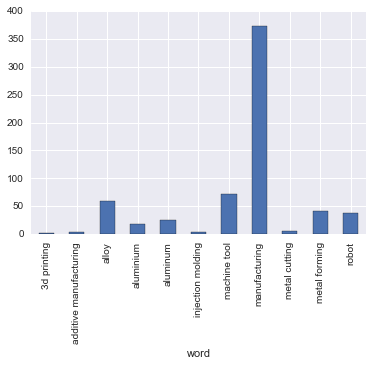

In [41]:
mfgf.groupby(['word'])['frequency'].sum().plot(kind='bar')

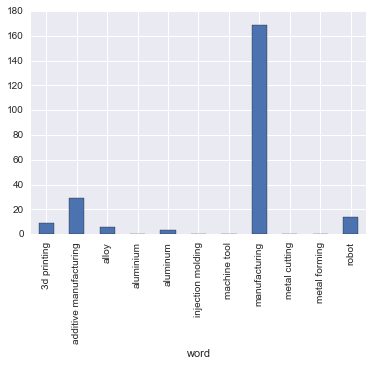

In [42]:
nsff.groupby(['word'])['frequency'].sum().plot(kind='bar')